# Importar Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
from datetime import datetime

## Leer archivos

In [ ]:
Positivos = pd.read_csv('dataset/positivos_covid.csv')
Fallecidos = pd.read_csv('dataset/fallecidos_covid.csv')

## Visualizacion de la Data

In [ ]:
Positivos.head()

UUID DEPARTAMENTO PROVINCIA  \
0  7320cabdc1aaca6c59014cae76a134e6         LIMA      LIMA   
1  e81602051997ace8340bb8c18fe24c65         LIMA      LIMA   
2  cecdbf10074dbc011ae05b3cbd320a6f         LIMA      LIMA   
3  71ecb6bccb248b0bb2ac72ed51b5e979         LIMA      LIMA   
4  566af4276cbe9359abe93f9aa86396c3       ANCASH     SANTA   

                 DISTRITO METODODX  EDAD       SEXO FECHA_RESULTADO  
0              LURIGANCHO      PCR   0.0   FEMENINO       4/05/2020  
1           INDEPENDENCIA      PCR   0.0  MASCULINO       3/05/2020  
2  SAN JUAN DE MIRAFLORES      PCR   0.0   FEMENINO       6/04/2020  
3                    LIMA      PCR   0.0  MASCULINO      19/05/2020  
4          NUEVO CHIMBOTE      PCR   0.0  MASCULINO      19/05/2020

In [ ]:
Fallecidos.head()

UUID FECHA_FALLECIMIENTO  EDAD_DECLARADA  \
0  056f73432adaf077b06ab0f9453ce753          24/03/2020              76   
1  4bac0872ed7858eec6b438947227cf66          27/03/2020              64   
2  27aa0530a6faa06b6589a9271853f66d           9/05/2020              63   
3  5f13c1fd068654311d45f1a45f1a532e          30/03/2020              53   
4  c656a7a3f3bdaecb4a97c6a1d2a80fb8           2/04/2020              68   

        SEXO FECHA_NAC DEPARTAMENTO PROVINCIA            DISTRITO  
0  MASCULINO       NaN        CUSCO     CUSCO               CUSCO  
1  MASCULINO       NaN        CUSCO     CUSCO               CUSCO  
2   FEMENINO       NaN       TUMBES    TUMBES  PAMPAS DE HOSPITAL  
3  MASCULINO       NaN         LIMA      LIMA          SAN ISIDRO  
4  MASCULINO       NaN        CUSCO     CUSCO               CUSCO

## Revisar la Data

In [ ]:
# Viendo la cantidad de datos
len(Positivos)

203736

Viendo si hay informacion faltante

In [ ]:
Positivos.isnull().values.any()

True

Vizualizando donde esta la informacion faltante

In [ ]:
Positivos.isnull().sum()

UUID                  0
DEPARTAMENTO          0
PROVINCIA             0
DISTRITO              0
METODODX              0
EDAD               1636
SEXO               2923
FECHA_RESULTADO    1459
dtype: int64

In [ ]:
# El dato de la edad no nos interesa para saber el R0
Positivos1 = Positivos.drop(['EDAD'], axis=1)
# Convertimos la fecha al formato correcto
Positivos1["FECHA_RESULTADO"] = pd.to_datetime(Positivos1["FECHA_RESULTADO"], dayfirst=True)
# Eliminamos los NAN
Pos_sin_nan = Positivos1.dropna()
# Revisamos de nuevo
Pos_sin_nan.isnull().sum()

UUID               0
DEPARTAMENTO       0
PROVINCIA          0
DISTRITO           0
METODODX           0
SEXO               0
FECHA_RESULTADO    0
dtype: int64

In [ ]:
# Vemos la cantidad de datos sin datos vacios
len(Pos_sin_nan)

200743

In [ ]:
#Obtenemos una descripciuon de la informacion
Pos_sin_nan.describe()

UUID DEPARTAMENTO PROVINCIA  \
count                             200743       200743    200743   
unique                            200743           25       193   
top     dd093e7b6a7ff6e1e389aed41e45104a         LIMA      LIMA   
freq                                   1       118857    112197   
first                                NaN          NaN       NaN   
last                                 NaN          NaN       NaN   

                      DISTRITO METODODX       SEXO      FECHA_RESULTADO  
count                   200743   200743     200743               200743  
unique                    1035        2          2                   95  
top     SAN JUAN DE LURIGANCHO       PR  MASCULINO  2020-05-27 00:00:00  
freq                     10877   152601     119001                 7294  
first                      NaN      NaN        NaN  2020-03-06 00:00:00  
last                       NaN      NaN        NaN  2020-06-08 00:00:00

podemos ver que en fecha tenemos 95 fechas diferentes

In [ ]:
# Observamos los valores de fechas unicos
Pos_sin_nan['FECHA_RESULTADO'].unique()

array(['2020-05-04T00:00:00.000000000', '2020-05-03T00:00:00.000000000',
       '2020-04-06T00:00:00.000000000', '2020-05-19T00:00:00.000000000',
       '2020-05-07T00:00:00.000000000', '2020-05-28T00:00:00.000000000',
       '2020-04-10T00:00:00.000000000', '2020-04-16T00:00:00.000000000',
       '2020-05-11T00:00:00.000000000', '2020-06-04T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-04-25T00:00:00.000000000', '2020-05-18T00:00:00.000000000',
       '2020-05-08T00:00:00.000000000', '2020-05-12T00:00:00.000000000',
       '2020-03-20T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-05-16T00:00:00.000000000', '2020-04-17T00:00:00.000000000',
       '2020-04-18T00:00:00.000000000', '2020-04-15T00:00:00.000000000',
       '2020-04-19T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-04-08T00:00:00.000000000',
       '2020-04-07T00:00:00.000000000', '2020-04-05

In [ ]:
# Observamos los valores de sexo unicos
Pos_sin_nan['SEXO'].unique()

array(['FEMENINO', 'MASCULINO'], dtype=object)

In [ ]:
# Observamos los valores de departamentos unicos
print(Pos_sin_nan['DEPARTAMENTO'].unique())
print('N° de departamentos: ', len(Pos_sin_nan['DEPARTAMENTO'].unique()))

['LIMA' 'ANCASH' 'PIURA' 'CALLAO' 'CAJAMARCA' 'LA LIBERTAD' 'LORETO'
 'SAN MARTIN' 'ICA' 'AYACUCHO' 'LAMBAYEQUE' 'PUNO' 'UCAYALI' 'AREQUIPA'
 'AMAZONAS' 'APURIMAC' 'CUSCO' 'HUANCAVELICA' 'HUANUCO' 'JUNIN' 'TACNA'
 'PASCO' 'MOQUEGUA' 'TUMBES' 'MADRE DE DIOS']
N° de departamentos:  25


## creamos un nuevo dataframe por cantidad de contagiados por dia

In [ ]:
dia = []
fecha = []
hombres = []
mujeres = []
lima = []
ancash = []
piura = []
callao = []
cajamarca = []
la_libertad = []
loreto = []
san_martin = []
ica = []
ayacucho = []
lambayeque = []
puno = []
ucayali = []
arequipa = []
amazonas = []
apurimac = []
cusco = []
huancavelica = []
huanuco = []
junin = []
tacna = []
pasco = []
moquegua = []
tumbes = []
madre_de_dios = []


for i in range(0, len(Pos_sin_nan['FECHA_RESULTADO'].unique())):
        dia1 = Pos_sin_nan[Pos_sin_nan['FECHA_RESULTADO'] == Pos_sin_nan['FECHA_RESULTADO'].unique()[i]]
        Hombres = dia1[dia1['SEXO'] == Pos_sin_nan['SEXO'].unique()[1]]
        Mujeres = dia1[dia1['SEXO'] == Pos_sin_nan['SEXO'].unique()[0]]
        dia2 = Pos_sin_nan['FECHA_RESULTADO'].unique()[i]
        dia.append(len(dia1))
        fecha.append(dia2)
        hombres.append(len(Hombres))
        mujeres.append(len(Mujeres))
        LIMA = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[0]]
        ANCASH = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[1]]
        PIURA = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[2]]
        CALLAO = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[3]]
        CAJAMARCA = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[4]]
        LA_LIBERTAD = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[5]]
        LORETO = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[6]]
        SAN_MARTIN = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[7]]
        ICA = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[8]]
        AYACUCHO = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[9]]
        LAMBAYEQUE = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[10]]
        PUNO = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[11]]
        UCAYALI = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[12]]
        AREQUIPA = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[13]]
        AMAZONAS = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[14]]
        APURIMAC = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[15]]
        CUSCO = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[16]]
        HUANCAVELICA = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[17]]
        HUANUCO = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[18]]
        JUNIN = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[19]]
        TACNA = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[20]]
        PASCO = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[21]]
        MOQUEGUA = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[22]]
        TUMBES = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[23]]
        MADRE_DE_DIOS = dia1[dia1['DEPARTAMENTO'] == Pos_sin_nan['DEPARTAMENTO'].unique()[24]]
        lima.append(len(LIMA))
        ancash.append(len(ANCASH))
        piura.append(len(PIURA))
        callao.append(len(CALLAO))
        cajamarca.append(len(CAJAMARCA))
        la_libertad.append(len(LA_LIBERTAD))
        loreto.append(len(LORETO))
        san_martin.append(len(SAN_MARTIN))
        ica.append(len(ICA))
        ayacucho.append(len(AYACUCHO))
        lambayeque.append(len(LAMBAYEQUE))
        puno.append(len(PUNO))
        ucayali.append(len(UCAYALI))
        arequipa.append(len(AREQUIPA))
        amazonas.append(len(AMAZONAS))
        apurimac.append(len(APURIMAC))
        cusco.append(len(CUSCO))
        huancavelica.append(len(HUANCAVELICA))
        huanuco.append(len(HUANUCO))
        junin.append(len(JUNIN))
        tacna.append(len(TACNA))
        pasco.append(len(PASCO))
        moquegua.append(len(MOQUEGUA))
        tumbes.append(len(TUMBES))
        madre_de_dios.append(len(MADRE_DE_DIOS))

               
df1 = pd.DataFrame(dia)
df1 = df1.rename(columns = {0:'N° de contagios'})
df2 = pd.DataFrame(fecha)
df2 = df2.rename(columns = {0:'Fecha'})
df3 = pd.DataFrame(hombres)
df3 = df3.rename(columns = {0:'Masculino'})
df4 = pd.DataFrame(mujeres)
df4 = df4.rename(columns = {0:'Femenino'})
df5 = pd.DataFrame(lima)
df5 = df5.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[0]})
df6 = pd.DataFrame(ancash)
df6 = df6.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[1]})
df7 = pd.DataFrame(piura)
df7 = df7.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[2]})
df8 = pd.DataFrame(callao)
df8 = df8.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[3]})
df9 = pd.DataFrame(cajamarca)
df9 = df9.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[4]})
df10 = pd.DataFrame(la_libertad)
df10 = df10.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[5]})
df11 = pd.DataFrame(loreto)
df11 = df11.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[6]})
df12 = pd.DataFrame(san_martin)
df12 = df12.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[7]})
df13 = pd.DataFrame(ica)
df13 = df13.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[8]})
df14 = pd.DataFrame(ayacucho)
df14 = df14.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[9]})
df15 = pd.DataFrame(lambayeque)
df15 = df15.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[10]})
df16 = pd.DataFrame(puno)
df16 = df16.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[11]})
df17 = pd.DataFrame(ucayali)
df17 = df17.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[12]})
df18 = pd.DataFrame(arequipa)
df18 = df18.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[13]})
df19 = pd.DataFrame(amazonas)
df19 = df19.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[14]})
df20 = pd.DataFrame(apurimac)
df20 = df20.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[15]})
df21 = pd.DataFrame(cusco)
df21 = df21.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[16]})
df22 = pd.DataFrame(huancavelica)
df22 = df22.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[17]})
df23 = pd.DataFrame(huanuco)
df23 = df23.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[18]})
df24 = pd.DataFrame(junin)
df24 = df24.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[19]})
df25 = pd.DataFrame(tacna)
df25 = df25.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[20]})
df26 = pd.DataFrame(pasco)
df26 = df26.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[21]})
df27 = pd.DataFrame(moquegua)
df27 = df27.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[22]})
df28 = pd.DataFrame(tumbes)
df28 = df28.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[23]})
df29 = pd.DataFrame(madre_de_dios)
df29 = df29.rename(columns = {0:Pos_sin_nan['DEPARTAMENTO'].unique()[24]})  

DF_R0 = pd.concat([df2, df1, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29],axis=1)

#### Ahora podemos ver que por cada fecha nos da el número de contagiados ya sea en todo Perú (N° de contagios) o por cada departamento 

In [ ]:
DF_R0.head()

Fecha  N° de contagios  Masculino  Femenino  LIMA  ANCASH  PIURA  \
0 2020-05-04             3800       2194      1606  2324      97    211   
1 2020-05-03             1865       1077       788  1213      25     84   
2 2020-04-06              634        382       252   470      13      8   
3 2020-05-19             5089       3049      2040  2812     281    262   
4 2020-05-07             3598       2147      1451  2379      78    146   

   CALLAO  CAJAMARCA  LA LIBERTAD  ...  APURIMAC  CUSCO  HUANCAVELICA  \
0     196         14          120  ...         6      7             2   
1      95         13           50  ...         0      2             6   
2      66          0            4  ...         0      1             5   
3     382         28          133  ...         2     39            16   
4     329          8           54  ...         0     48             5   

   HUANUCO  JUNIN  TACNA  PASCO  MOQUEGUA  TUMBES  MADRE DE DIOS  
0        7     44      5     20        12      21              5  
1        4     48      4      2         0      11              0  
2        3      0      0      0         1       4              0  
3       20     39     12     15        39      40              9  
4       12     63      1      7         4      14              2  

[5 rows x 29 columns]

In [ ]:
#exportar data R0
DF_R0.to_csv(r'dataset/DF_R0.csv')

In [ ]:
# Importar data R0
DF_R0 = pd.read_csv('dataset/DF_R0.csv')
DF_R0 = DF_R0.drop(['Unnamed: 0'], axis=1)

## Ordenamos la data por Fecha

In [ ]:
DF_R0 = DF_R0.sort_values(by='Fecha')
DF_R0 = DF_R0.set_index('Fecha')
DF_R0=DF_R0.reset_index(drop=False)
DF_R0=DF_R0.reset_index(drop=False)
DF_R0.head()

index       Fecha  N° de contagios  Masculino  Femenino  LIMA  ANCASH  \
0      0  2020-03-06                1          1         0     1       0   
1      1  2020-03-07                5          4         1     4       0   
2      2  2020-03-08                2          1         1     2       0   
3      3  2020-03-09                3          2         1     1       0   
4      4  2020-03-10                1          1         0     1       0   

   PIURA  CALLAO  CAJAMARCA  ...  APURIMAC  CUSCO  HUANCAVELICA  HUANUCO  \
0      0       0          0  ...         0      0             0        0   
1      0       0          0  ...         0      0             0        0   
2      0       0          0  ...         0      0             0        0   
3      0       0          0  ...         0      0             0        2   
4      0       0          0  ...         0      0             0        0   

   JUNIN  TACNA  PASCO  MOQUEGUA  TUMBES  MADRE DE DIOS  
0      0      0      0         0       0              0  
1      0      0      0         0       0              0  
2      0      0      0         0       0              0  
3      0      0      0         0       0              0  
4      0      0      0         0       0              0  

[5 rows x 30 columns]

## Calculamos R0 a nivel nacional y Departamental

In [ ]:
# Calculando R0 por dia
R0 = [1,]
for i in range(1,len(DF_R0),1):
    r0 = DF_R0['N° de contagios'][i]/DF_R0['N° de contagios'][i-1]
    R0.append(r0)
df30 = pd.DataFrame(R0)
df30 = df30.rename(columns = {0:'R0_por_día'})  
DF_R0 = pd.concat([DF_R0, df30],axis=1)
DF_R0

index       Fecha  N° de contagios  Masculino  Femenino  LIMA  ANCASH  \
0       0  2020-03-06                1          1         0     1       0   
1       1  2020-03-07                5          4         1     4       0   
2       2  2020-03-08                2          1         1     2       0   
3       3  2020-03-09                3          2         1     1       0   
4       4  2020-03-10                1          1         0     1       0   
..    ...         ...              ...        ...       ...   ...     ...   
90     90  2020-06-04             3551       1916      1635  1798     104   
91     91  2020-06-05             4161       2269      1892  2596      68   
92     92  2020-06-06             3871       2179      1692  2366     110   
93     93  2020-06-07             2305       1285      1020  1619      93   
94     94  2020-06-08             2624       1426      1198  1496      62   

    PIURA  CALLAO  CAJAMARCA  ...  CUSCO  HUANCAVELICA  HUANUCO  JUNIN  TACNA  \
0       0       0          0  ...      0             0        0      0      0   
1       0       0          0  ...      0             0        0      0      0   
2       0       0          0  ...      0             0        0      0      0   
3       0       0          0  ...      0             0        2      0      0   
4       0       0          0  ...      0             0        0      0      0   
..    ...     ...        ...  ...    ...           ...      ...    ...    ...   
90    383     187         16  ...     14            12       75     21     14   
91    295     227         28  ...     17             4       36     15     19   
92    195     219         34  ...     40            11       12     43     15   
93     28      82          7  ...     20            13       12     39      3   
94     78     192         23  ...      7             7       14     45      9   

    PASCO  MOQUEGUA  TUMBES  MADRE DE DIOS  R0_por_día  
0       0         0       0              0    1.000000  
1       0         0       0              0    5.000000  
2       0         0       0              0    0.400000  
3       0         0       0              0    1.500000  
4       0         0       0              0    0.333333  
..    ...       ...     ...            ...         ...  
90     29        22      25             86    1.694179  
91     12         4      49             20    1.171783  
92      8         2      23             21    0.930305  
93     11         2       8              5    0.595453  
94      8         2      18             34    1.138395  

[95 rows x 31 columns]

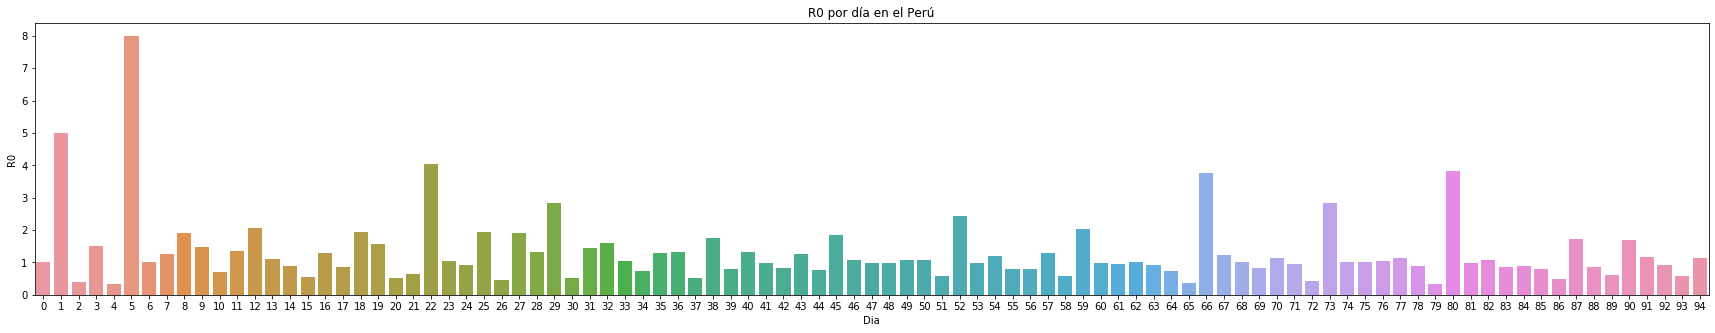

In [ ]:
plt.subplots(figsize = (30, 5))
sns.barplot(x='index', y="R0_por_día", data=DF_R0)
plt.title('R0 por día en el Perú')
plt.xlabel('Dia')
plt.ylabel('R0')
plt.show()

In [ ]:
import plotly.express as px
fig = px.line(DF_R0, x='Fecha', y='R0_por_día', title='R0 por dia (Nacional)')
fig.show()

In [ ]:
# Calculando R0 por dia por departamento
def dept(a):
    if a == "LIMA":
        R0_dept = [1,]
    else:
        R0_dept = [0,]
    for i in range(1,len(DF_R0),1):
        r0 = DF_R0[a][i]/DF_R0[a][i-1]
        R0_dept.append(r0)
    df31 = pd.DataFrame(R0_dept)
    df31 = df31.rename(columns = {0:'R0_'+ a})  
    Por_dept = pd.concat([DF_R0, df31],axis=1)
    #plt = px.line(Por_dept, x='Fecha', y='R0_'+ a, title='R0 por dia '+a)
    #plt.show()
    return df31

In [ ]:
LIMA = dept('LIMA')
ANCASH = dept('ANCASH')
PIURA = dept('PIURA')
CALLAO = dept('CALLAO')
CAJAMARCA = dept('CAJAMARCA')
LA_LIBERTAD = dept('LA LIBERTAD')
LORETO = dept('LORETO')
SAN_MARTIN = dept('SAN MARTIN')
ICA = dept('ICA')
AYACUCHO = dept('AYACUCHO')
LAMBAYEQUE = dept('LAMBAYEQUE')
PUNO = dept('PUNO')
UCAYALI = dept('UCAYALI')
AREQUIPA = dept('AREQUIPA')
AMAZONAS = dept('AMAZONAS')
APURIMAC = dept('APURIMAC')
CUSCO = dept('CUSCO')
HUANCAVELICA = dept('HUANCAVELICA')
HUANUCO = dept('HUANUCO')
JUNIN = dept('JUNIN')
TACNA = dept('TACNA')
PASCO = dept('PASCO')
MOQUEGUA = dept('MOQUEGUA')
TUMBES = dept('TUMBES')
MADRE_DE_DIOS = dept('MADRE DE DIOS')

In [ ]:
Por_dept = pd.concat([DF_R0,LIMA,ANCASH,PIURA,CALLAO,CAJAMARCA,LA_LIBERTAD,LORETO,SAN_MARTIN,ICA,AYACUCHO,LAMBAYEQUE,PUNO,UCAYALI,AREQUIPA,AMAZONAS,APURIMAC,CUSCO,HUANCAVELICA,HUANUCO,JUNIN,TACNA,PASCO,MOQUEGUA,TUMBES,MADRE_DE_DIOS],axis=1)

In [ ]:
Por_dept.to_csv(r'dataset/Por_dept.csv')

## Calcuamos factor R0 en un plazo X de tiempo (5, 10 y 15)

Para cambiar el plazo remplazar el valor paso por la cantidad de dias deseado

In [ ]:
def dept(B):
        R1 = []
        paso = 15
        tiempo = paso
        r1 = 0
        a = 2
        C = []

        for i in range(0,tiempo):
                r1 = r1+DF_R0[B][i]
        R1.append(r1)
        while a <= len(DF_R0)/paso:
                for i in range(tiempo,tiempo+paso,1):
                        r1 = r1+DF_R0[B][i]
                R1.append(r1)
                tiempo = tiempo+paso
                a = a+1

        df30 = pd.DataFrame(R1)
        df30 = df30.rename(columns = {0:'R0_por_X_días'})  

        A=[]
        for i in range(1,len(df30)):
                a = df30['R0_por_X_días'][i]/df30['R0_por_X_días'][i-1]
                A.append(a)

        df50 = pd.DataFrame(A)
        if B == 'N° de contagios':
                df50 = df50.rename(columns = {0:'R0_por_día'})
        else:
                df50 = df50.rename(columns = {0:'R0_'+B})
        return df50

In [ ]:
paso = 15
C=[]
for i in range(5,95,paso):
    fecha = DF_R0['Fecha'].unique()[i]
    C.append(fecha)
df51 = pd.DataFrame(C)
df51 = df51.rename(columns = {0:'Fecha'})

In [ ]:
Todo = dept('N° de contagios')
LIMA = dept('LIMA')
ANCASH = dept('ANCASH')
PIURA = dept('PIURA')
CALLAO = dept('CALLAO')
CAJAMARCA = dept('CAJAMARCA')
LA_LIBERTAD = dept('LA LIBERTAD')
LORETO = dept('LORETO')
SAN_MARTIN = dept('SAN MARTIN')
ICA = dept('ICA')
AYACUCHO = dept('AYACUCHO')
LAMBAYEQUE = dept('LAMBAYEQUE')
PUNO = dept('PUNO')
UCAYALI = dept('UCAYALI')
AREQUIPA = dept('AREQUIPA')
AMAZONAS = dept('AMAZONAS')
APURIMAC = dept('APURIMAC')
CUSCO = dept('CUSCO')
HUANCAVELICA = dept('HUANCAVELICA')
HUANUCO = dept('HUANUCO')
JUNIN = dept('JUNIN')
TACNA = dept('TACNA')
PASCO = dept('PASCO')
MOQUEGUA = dept('MOQUEGUA')
TUMBES = dept('TUMBES')
MADRE_DE_DIOS = dept('MADRE DE DIOS')

In [ ]:
Por_5Dias = pd.concat([df51,Todo,LIMA,ANCASH,PIURA,CALLAO,CAJAMARCA,LA_LIBERTAD,LORETO,SAN_MARTIN,ICA,AYACUCHO,LAMBAYEQUE,PUNO,UCAYALI,AREQUIPA,AMAZONAS,APURIMAC,CUSCO,HUANCAVELICA,HUANUCO,JUNIN,TACNA,PASCO,MOQUEGUA,TUMBES,MADRE_DE_DIOS],axis=1)

In [ ]:
Por_5Dias

Fecha  R0_por_día   R0_LIMA  R0_ANCASH   R0_PIURA  R0_CALLAO  \
0  2020-03-11    9.062092  8.185345   6.250000   2.176471  42.833333   
1  2020-03-26    6.564371  6.128489  14.320000  14.324324   7.392996   
2  2020-04-10    3.153656  2.968723   3.600559   4.762264   2.535263   
3  2020-04-25    1.940529  1.962663   2.282389   1.797940   1.778078   
4  2020-05-10    1.653809  1.607167   1.738613   2.108638   1.552831   
5  2020-05-25         NaN       NaN        NaN        NaN        NaN   

   R0_CAJAMARCA  R0_LA LIBERTAD  R0_LORETO  R0_SAN MARTIN  ...  R0_APURIMAC  \
0           inf       12.250000  10.500000            inf  ...          inf   
1     12.400000        5.775510   4.442177      11.250000  ...    34.000000   
2      5.467742        4.802120   2.998469       3.800000  ...     2.970588   
3      1.536873        2.055188   2.024515       2.628655  ...     1.257426   
4      1.673704        1.958826   1.557265       1.844271  ...     1.921260   
5           NaN             NaN        NaN            NaN  ...          NaN   

    R0_CUSCO  R0_HUANCAVELICA  R0_HUANUCO  R0_JUNIN  R0_TACNA   R0_PASCO  \
0  15.000000              inf    3.000000  2.888889       inf        inf   
1   2.416667        13.000000   23.333333  7.461538  4.625000  11.000000   
2   2.186207         7.769231    2.307143  3.510309  3.459459   4.424242   
3   2.293375         1.594059    1.733746  2.019090  1.671875   1.801370   
4   1.616231         1.552795    1.573214  1.517091  2.219626   2.224335   
5        NaN              NaN         NaN       NaN       NaN        NaN   

   R0_MOQUEGUA  R0_TUMBES  R0_MADRE DE DIOS  
0          inf        inf          2.000000  
1    30.000000   5.500000         30.500000  
2     5.200000   2.373737          2.131148  
3     1.794872   1.727660          1.984615  
4     2.414286   1.540640          2.484496  
5          NaN        NaN               NaN  

[6 rows x 27 columns]

In [ ]:
Por_5Dias.to_csv(r'dataset/Por_15Dias.csv')

In [ ]:
plt = px.line(Por_5Dias, x='Fecha', y='R0_LIMA', title='Todo Peru')
plt.show()